<a href="https://colab.research.google.com/github/Ashkar077/Facial-Emotion-Recognition/blob/main/Facial_Emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/facial_emotion_dataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [32]:
import numpy as np
import cv2
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [33]:
pip install split-folders

In [34]:
import os
import splitfolders
splitfolders.ratio('/content/facial_emotion_dataset/dataset', output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 15453 files [00:16, 912.61 files/s]


In [60]:
train_dir = '/content/output/train'
val_dir = '/content/output/test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 12361 images belonging to 6 classes.
Found 1549 images belonging to 6 classes.


In [53]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(6, activation='softmax'))

In [54]:
tf.keras.optimizers.legacy.Adam
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
print(emotion_model.output.shape)
print(train_generator.labels.shape)

(None, 6)
(12361,)


In [61]:
# Assuming you have a train_generator and validation_generator defined
# ...

# Calculate the number of steps per epoch based on the number of batches and steps per batch
steps_per_epoch_train = len(train_generator)
steps_per_epoch_validation = len(validation_generator)

# Rerun the model training with adjusted steps_per_epoch
emotion_model_info = emotion_model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_train,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation)


<ipython-input-61-ac2c309eacc9>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


Epoch 1/5
194/194 [==============================] - 238s 1s/step - loss: 1.5015 - accuracy: 0.3659 - val_loss: 1.4098 - val_accuracy: 0.4261
Epoch 2/5
194/194 [==============================] - 237s 1s/step - loss: 1.3664 - accuracy: 0.4437 - val_loss: 1.3234 - val_accuracy: 0.4810
Epoch 3/5
194/194 [==============================] - 227s 1s/step - loss: 1.2674 - accuracy: 0.4924 - val_loss: 1.2138 - val_accuracy: 0.5216
Epoch 4/5
194/194 [==============================] - 224s 1s/step - loss: 1.1844 - accuracy: 0.5279 - val_loss: 1.1337 - val_accuracy: 0.5436
Epoch 5/5
194/194 [==============================] - 221s 1s/step - loss: 1.1288 - accuracy: 0.5482 - val_loss: 1.0761 - val_accuracy: 0.5726


In [62]:
emotion_model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [63]:
from keras.models import load_model
emotion_model = load_model('model.h5')

In [64]:
def emotion_analysis(emotions):
    objects = ('ahegao', 'angry', 'happy', 'neutral', 'sad', 'surprise',)
    y_pos = np.arange(len(objects))

    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

    plt.show()

1/1 [==============================] - 0s 22ms/step


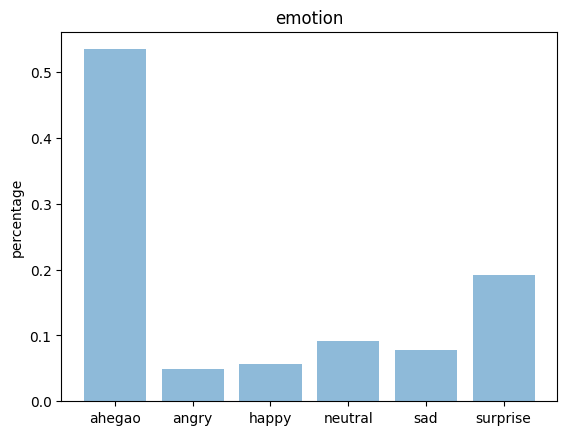

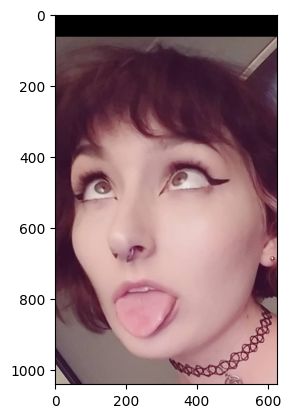

In [67]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = '/content/output/test/Ahegao/cropped_emotions.189327~ahegao.png'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = emotion_model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);


plt.imshow(true_image)
plt.show()